In [41]:
import os, sys, PIL
import numpy as np
np.random.seed(1234)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('data/iris.data' , header=None)
df.columns = ['sepal length','sepal width','petal length','petal width','type']
df.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


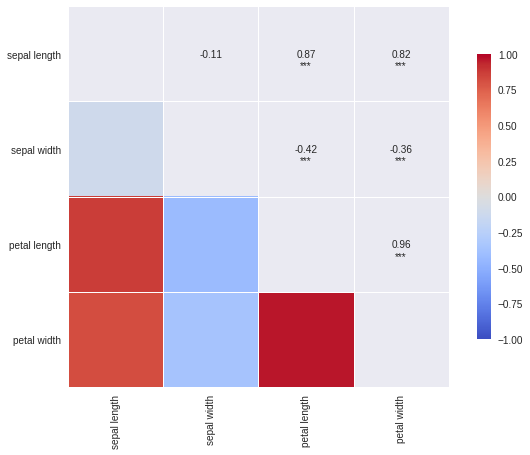

In [4]:
sns.corrplot(df, diag_names=False)

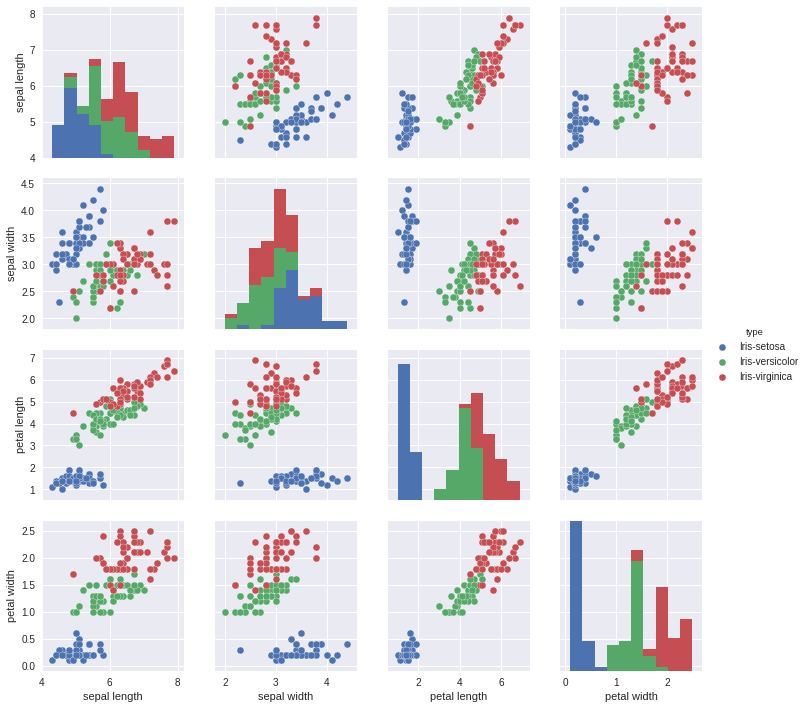

In [6]:
sns.pairplot(df, hue='type')

In [36]:
Y = df['type']
X = df.drop('type', axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [39]:
lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)
pred = lr.predict(Xtest)
print 'Accuracy: ', sklearn.metrics.accuracy_score(pred, Ytest)

Accuracy:  0.977777777778


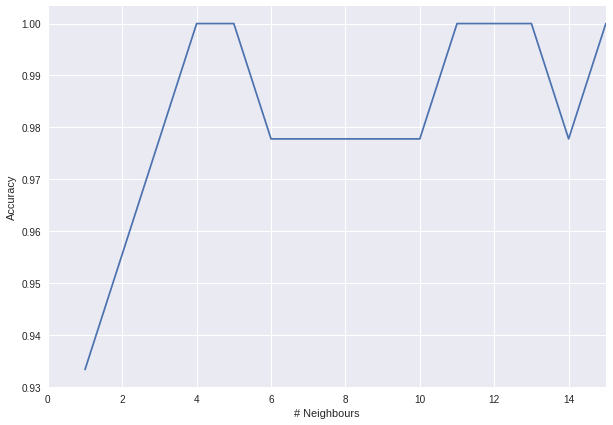

In [48]:
x = range(1,16)
acc = []
for i in x:
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(Xtrain, Ytrain)
    pred = kn.predict(Xtest)
    acc.append(sklearn.metrics.accuracy_score(pred, Ytest))
plt.plot(x, acc)
plt.xlim([0,15])
plt.xlabel('# Neighbours')
plt.ylabel('Accuracy')